# Analyzing Portfolio Risk and Return

This is a Jupyter notebook that aims to offer clients a one-stop online investment solution for their retirement portfolios that’s both inexpensive and high quality. Reviewing 4 new potential portfolios, this notebook will provide financial data to determine the fund with the most investment potential based on key risk-management metrics: the daily returns, standard deviations, Sharpe ratios, and betas for each of the funds using the S&P 500 as the base market.


---

We will be doing this through a few simple steps:

### Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents.

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots.

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta.

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio against that asset or portfolios possible return. 

---

From the above informaiton we will then...

#### Diversify the Portfolio

Evaluate how the portfolios react relative to the broader market.

---

#### Let us begin!

In [1]:
# Imports the required libraries and dependencies.
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

#### Collect the data from `whale_navs.csv`.

In [2]:
# Imports the data by reading in the CSV file and setting the DatetimeIndex.
whale_navs_df = pd.read_csv(
    Path("./Resources/whale_navs.csv"),
    index_col="date",
    parse_dates=True,
    infer_datetime_format=True)

# Reviews the first 5 rows of the DataFrame to make sure it was read correctly.
whale_navs_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


#### Create the daily returns DataFrames.

In [3]:
# Prepares for the analysis by converting the dataframe of NAVs and prices to daily returns for each of the portfolios and the market.
# Drops any rows with missing values.
# Reviews the first five rows of the daily returns DataFrames to ensure accuracy.

In [4]:
# Soros Fund Management LLC

sfm_daily_returns = whale_navs_df.loc[:,"SOROS FUND MANAGEMENT LLC"].pct_change().dropna()
sfm_daily_returns.head()

date
2014-10-02   -0.000442
2014-10-03    0.001052
2014-10-06    0.002456
2014-10-07   -0.002621
2014-10-08    0.000390
Name: SOROS FUND MANAGEMENT LLC, dtype: float64

In [5]:
# PAULSON & CO.INC.

pci_daily_returns = whale_navs_df.loc[:,"PAULSON & CO.INC."].pct_change().dropna()
pci_daily_returns.head()

date
2014-10-02    0.000150
2014-10-03    0.000368
2014-10-06   -0.000008
2014-10-07   -0.000317
2014-10-08    0.000369
Name: PAULSON & CO.INC., dtype: float64

In [6]:
# TIGER GLOBAL MANAGEMENT LLC

tgm_daily_returns = whale_navs_df.loc[:,"TIGER GLOBAL MANAGEMENT LLC"].pct_change().dropna()
tgm_daily_returns.head()

date
2014-10-02    0.000013
2014-10-03    0.000394
2014-10-06    0.000066
2014-10-07   -0.000208
2014-10-08    0.000242
Name: TIGER GLOBAL MANAGEMENT LLC, dtype: float64

In [7]:
# BERKSHIRE HATHAWAY INC

bhi_daily_returns = whale_navs_df.loc[:,"BERKSHIRE HATHAWAY INC"].pct_change().dropna()
bhi_daily_returns.head()

date
2014-10-02    0.000171
2014-10-03    0.001248
2014-10-06    0.000267
2014-10-07   -0.000587
2014-10-08    0.000842
Name: BERKSHIRE HATHAWAY INC, dtype: float64

In [8]:
# S&P 500

sp500_daily_returns = whale_navs_df.loc[:,"S&P 500"].pct_change().dropna()
sp500_daily_returns.head()

date
2014-10-02    0.000154
2014-10-03    0.011009
2014-10-06   -0.001170
2014-10-07   -0.015436
2014-10-08    0.017489
Name: S&P 500, dtype: float64

---

## Quantitative Analysis

The analysis has several components: performance, volatility, risk, risk-return profile, and portfolio diversification.

###  Analyze the Performance

First, we will analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents.

In [9]:
# Plots the daily return data of the 4 funds and the S&P 500.

<AxesSubplot:title={'center':'S&P 500'}, xlabel='date'>

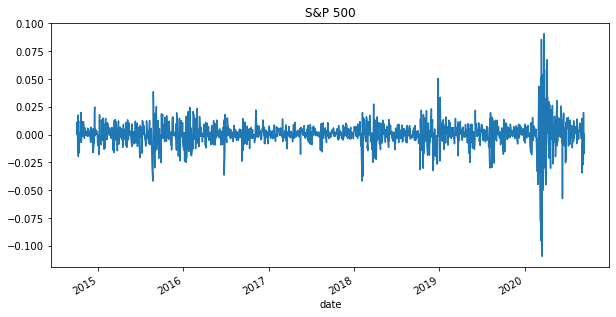

In [10]:
# S&P 500
sp500_daily_returns.plot(figsize=(10,5), title="S&P 500")

<AxesSubplot:title={'center':'Soros Fund Management LLC'}, xlabel='date'>

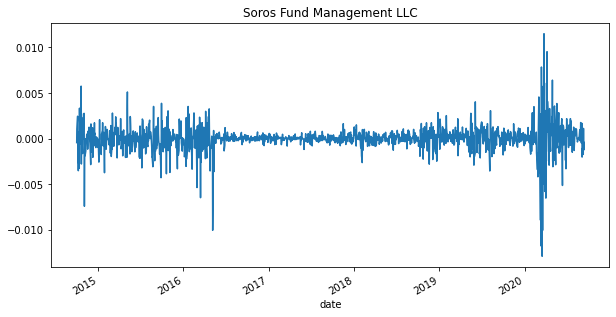

In [11]:
# Soros Fund Management LLC
sfm_daily_returns.plot(figsize=(10,5), title="Soros Fund Management LLC")

<AxesSubplot:title={'center':'PAULSON & CO.INC.'}, xlabel='date'>

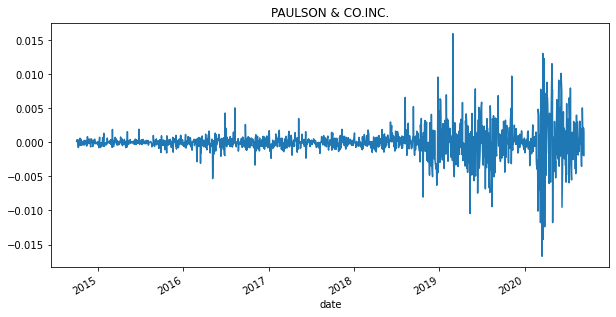

In [12]:
# PAULSON & CO.INC.
pci_daily_returns.plot(figsize=(10,5), title="PAULSON & CO.INC.")

<AxesSubplot:title={'center':'TIGER GLOBAL MANAGEMENT LLC'}, xlabel='date'>

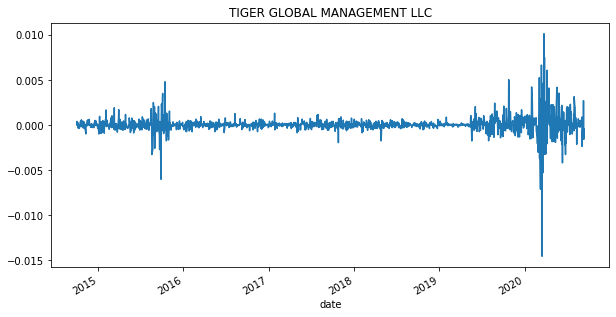

In [13]:
# TIGER GLOBAL MANAGEMENT LLC
tgm_daily_returns.plot(figsize=(10,5), title="TIGER GLOBAL MANAGEMENT LLC")

<AxesSubplot:title={'center':'BERKSHIRE HATHAWAY INC'}, xlabel='date'>

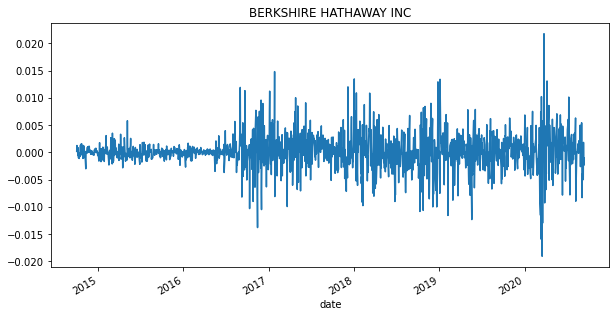

In [14]:
# BERKSHIRE HATHAWAY INC
bhi_daily_returns.plot(figsize=(10,5), title="BERKSHIRE HATHAWAY INC")

#### Next, we use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500.

In [15]:
# Calculates and plots the cumulative returns of the 4 fund portfolios and the S&P 500

In [16]:
# S&P 500

sp500_cumulative_returns = (1 + sp500_daily_returns).cumprod()

sp500_cumulative_returns.tail()

date
2020-09-04    1.762645
2020-09-08    1.714484
2020-09-09    1.748341
2020-09-10    1.717983
2020-09-11    1.718858
Name: S&P 500, dtype: float64

In [17]:
# Soros Fund Management LLC

sfm_cumulative_returns = (1 + sfm_daily_returns).cumprod()

sfm_cumulative_returns.tail()

date
2020-09-04    0.987355
2020-09-08    0.985640
2020-09-09    0.986739
2020-09-10    0.985498
2020-09-11    0.985086
Name: SOROS FUND MANAGEMENT LLC, dtype: float64

In [18]:
# PAULSON & CO.INC.

pci_cumulative_returns = (1 + pci_daily_returns).cumprod()

pci_cumulative_returns.tail()

date
2020-09-04    0.958187
2020-09-08    0.956378
2020-09-09    0.958409
2020-09-10    0.959740
2020-09-11    0.957887
Name: PAULSON & CO.INC., dtype: float64

In [19]:
# TIGER GLOBAL MANAGEMENT LLC

tgm_cumulative_returns = (1 + tgm_daily_returns).cumprod()

tgm_cumulative_returns.tail()

date
2020-09-04    1.055714
2020-09-08    1.054373
2020-09-09    1.057221
2020-09-10    1.055539
2020-09-11    1.055081
Name: TIGER GLOBAL MANAGEMENT LLC, dtype: float64

In [20]:
# BERKSHIRE HATHAWAY INC

bhi_cumulative_returns = (1 + bhi_daily_returns).cumprod()

bhi_cumulative_returns.tail()

date
2020-09-04    1.244856
2020-09-08    1.238608
2020-09-09    1.240858
2020-09-10    1.237883
2020-09-11    1.236625
Name: BERKSHIRE HATHAWAY INC, dtype: float64

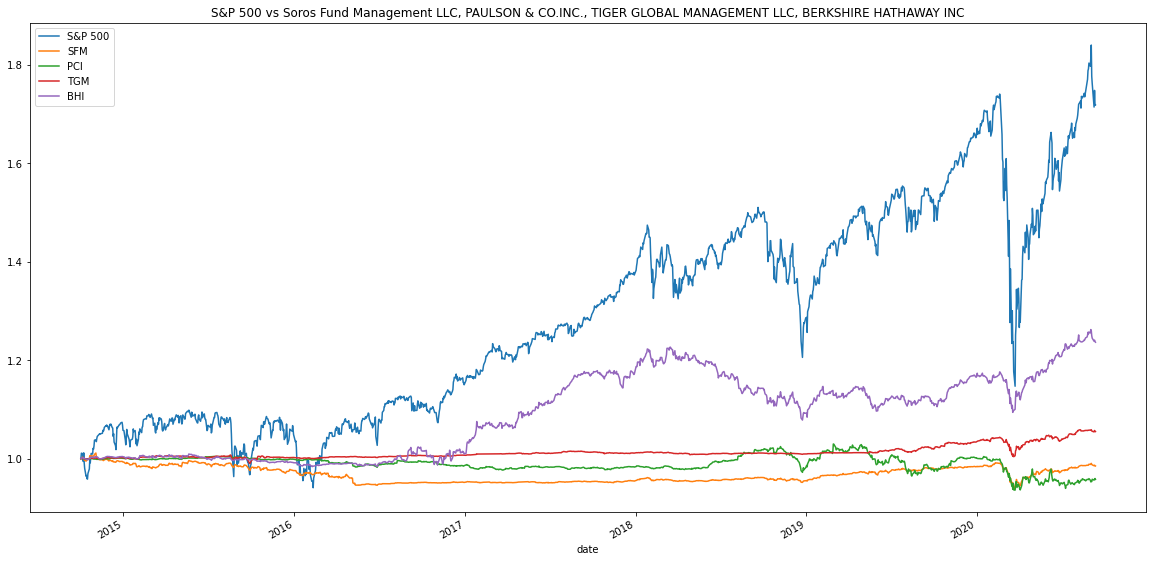

In [21]:
# Visualizes the cumulative returns using the Pandas plot function
ax = sp500_cumulative_returns.plot(
    legend="True",
    figsize=(20,10),
    title="S&P 500 vs Soros Fund Management LLC, PAULSON & CO.INC., TIGER GLOBAL MANAGEMENT LLC, BERKSHIRE HATHAWAY INC")
sfm_cumulative_returns.plot(ax=ax)
pci_cumulative_returns.plot(ax=ax)
tgm_cumulative_returns.plot(ax=ax)
bhi_cumulative_returns.plot(ax=ax)

ax.legend(["S&P 500", "SFM", "PCI", "TGM", "BHI"])

***Question** Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?*

***Answer** Overall, no, none of them outperfom the S&P 500, but there were some instances in 2015 and 2016 where they did.*

---

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index.

#### Using box plots we will visualize the daily return data for each of the four portfolios and for the S&P 500.

<AxesSubplot:title={'center':'Daily Return Data'}>

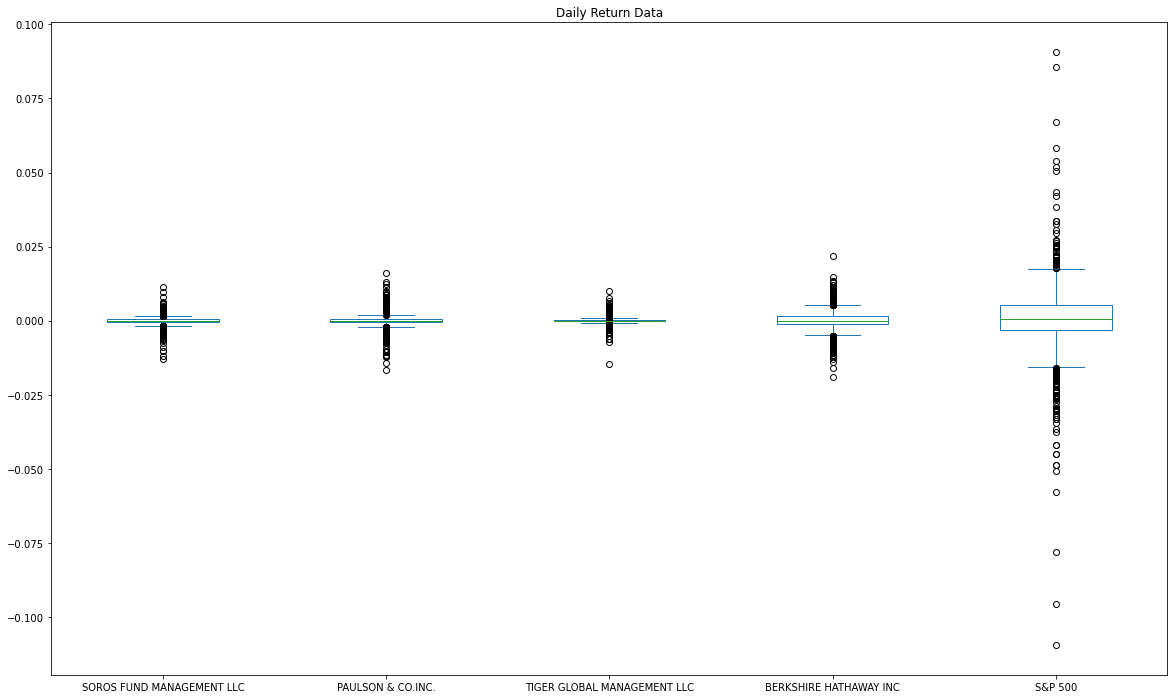

In [22]:
# Using the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500.
all_daily_returns = whale_navs_df.pct_change().dropna()

# Creates box plots to reflect the return data.
all_daily_returns.plot(kind = "box", title = "Daily Return Data", figsize = (20, 12))

#### Next, we will view the funds without the S&P 500. To give us a better view with which to compare them.

<AxesSubplot:title={'center':'Fund Daily Return Data'}>

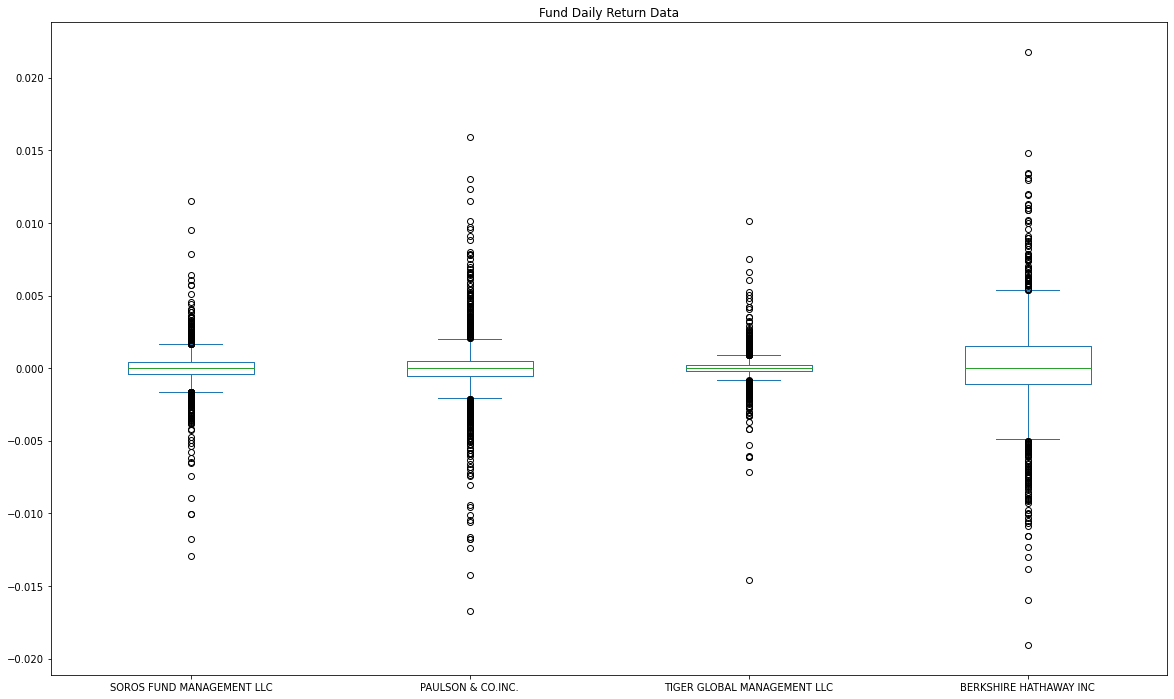

In [23]:
# Creates a new DataFrame containing only the 4 fund portfolios.
funds_daily_returns = whale_navs_df.pct_change().drop(columns = ["S&P 500"]).dropna()

# Creates box plots to reflect the return data for only the 4 fund portfolios.
funds_daily_returns.plot(kind = "box", title = "Fund Daily Return Data", figsize = (20, 12))

***Question** Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?*

***Answer** Berkshire Hathaway Inc is the most volatile with a large box, long whiskers, and a lot of outliers. Tiger Global Management LLC is the least volatile with a small box and whiskers, and most outliers being relatively close to the mean in comparison to the others.*

---

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta.

#### Calculates the standard deviation for each of the four portfolios and for the S&P 500.

In [24]:
# Calculates and sort the standard deviation for all 4 portfolios and the S&P 500.
all_standard_dev = all_daily_returns.std()

# Reviews the standard deviations sorted smallest to largest.
all_standard_dev.sort_values()

TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

#### Annualize the standard deviation for each of the four portfolios and for the S&P 500.

In [25]:
# Setting the annual trading days to 252.
annual_trading_days = 252

# Calculates and sorts the annualized standard deviation of the 4 portfolios and the S&P 500.
all_annual_std = all_standard_dev * np.sqrt(annual_trading_days)

# Reviews the annual standard deviations from smallest to largest.
all_annual_std.sort_values()

TIGER GLOBAL MANAGEMENT LLC    0.015804
SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

#### Plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index.

<AxesSubplot:title={'center':'21-Day Rolling Standard Deviation'}, xlabel='date'>

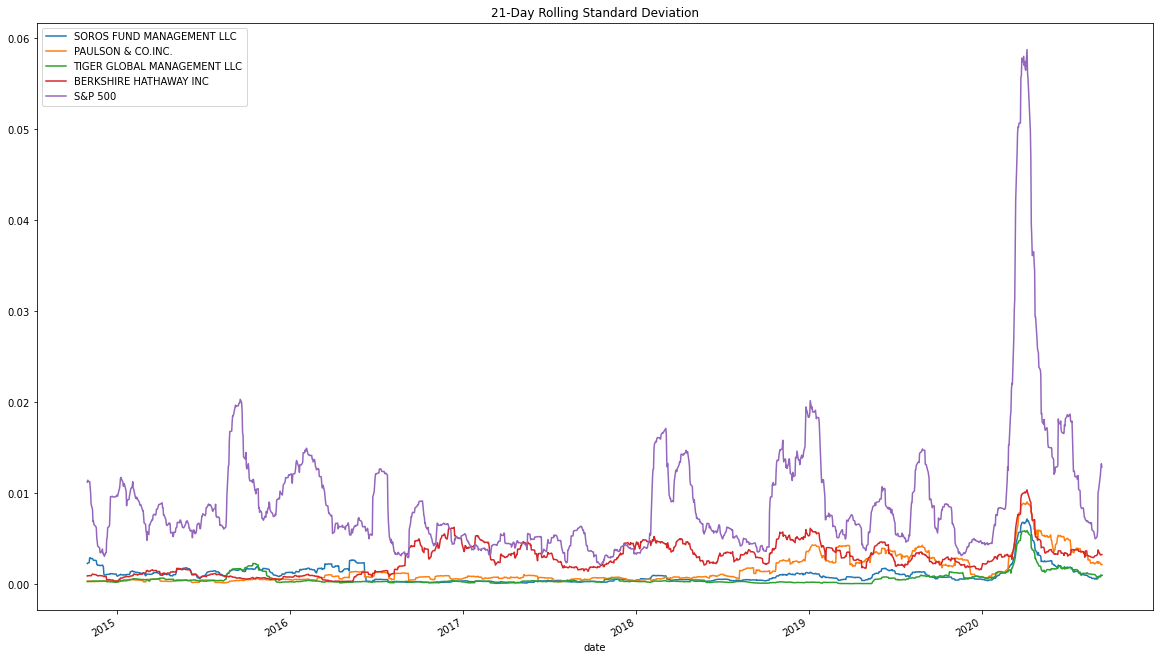

In [26]:
# Using the daily returns DataFrame and a 21-day rolling window, plots the rolling standard deviation of the 4 portfolios and the S&P 500.
all_std_rolling_21 = all_daily_returns.rolling(window = 21).std()

all_std_rolling_21.plot(figsize = (20, 12), title = ("21-Day Rolling Standard Deviation"))

#### Plot the rolling standard deviations of only the four fund portfolios.

<AxesSubplot:title={'center':'Funds 21-Day Rolling Standard Deviation'}, xlabel='date'>

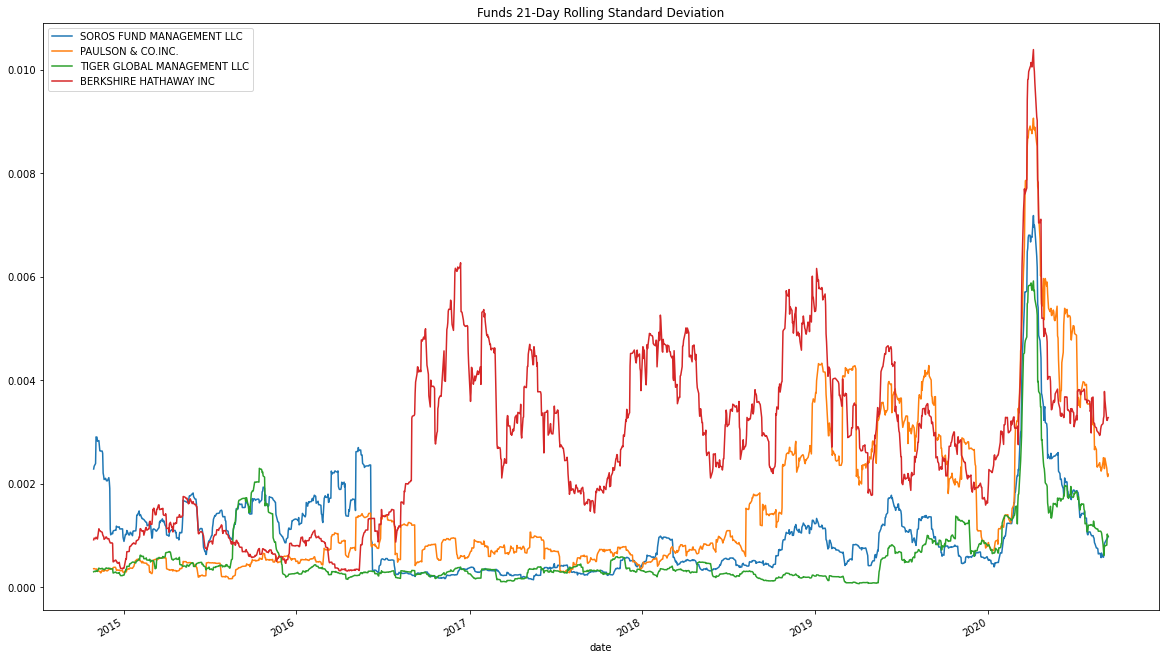

In [27]:
# Using the daily return data and a 21-day rolling window, plots the rolling standard deviation of just the 4 portfolios. 
funds_std_rolling_21 = funds_daily_returns.rolling(window = 21).std()

funds_std_rolling_21.plot(figsize = (20, 12), title = ("Funds 21-Day Rolling Standard Deviation"))

***Question 1**  Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?*

***Answer 1** None pose more risk than the S&P 500, but Berkshire Hathaway is the riskiest of them according to it's higher std compared to the others.

***Question 2** Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?*

***Answer 2** For most of the risk, no, big changes do seem to affect the funds though. And our good friends at Berkshire appear to react when the market moves.*


***Question 3** Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?*

***Answer 3** Initially Soros Fund appeared to have the most risk until late 2015 when Tiger grabbed the title, but lost it before the start of 2016. Then in mid 2016 Berkshire took over and has been holding as the reigning champ since with the occasional spike from Paulson passing them in riskiness.*

---

### Analyze the Risk-Return Profile

#### Calculate the annualized average return data for the four fund portfolios and for the S&P 500.

In [28]:
# Calculates the annual average return data for the for fund portfolios and the S&P 500.
all_annual_avg_return = all_daily_returns.mean() * annual_trading_days

# Reviews the annual average returns sorted from lowest to highest.
all_annual_avg_return.sort_values()

PAULSON & CO.INC.             -0.006633
SOROS FUND MANAGEMENT LLC     -0.002281
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

#### Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500.

In [29]:
# Calculates the annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.
all_sharpe_ratio = all_annual_avg_return / all_annual_std

# Reviews the Sharpe ratios sorted lowest to highest.
all_sharpe_ratio.sort_values()

PAULSON & CO.INC.             -0.189998
SOROS FUND MANAGEMENT LLC     -0.102290
TIGER GLOBAL MANAGEMENT LLC    0.579002
S&P 500                        0.589612
BERKSHIRE HATHAWAY INC         0.717512
dtype: float64

#### Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart.

<AxesSubplot:title={'center':'Sharpe Ratios'}>

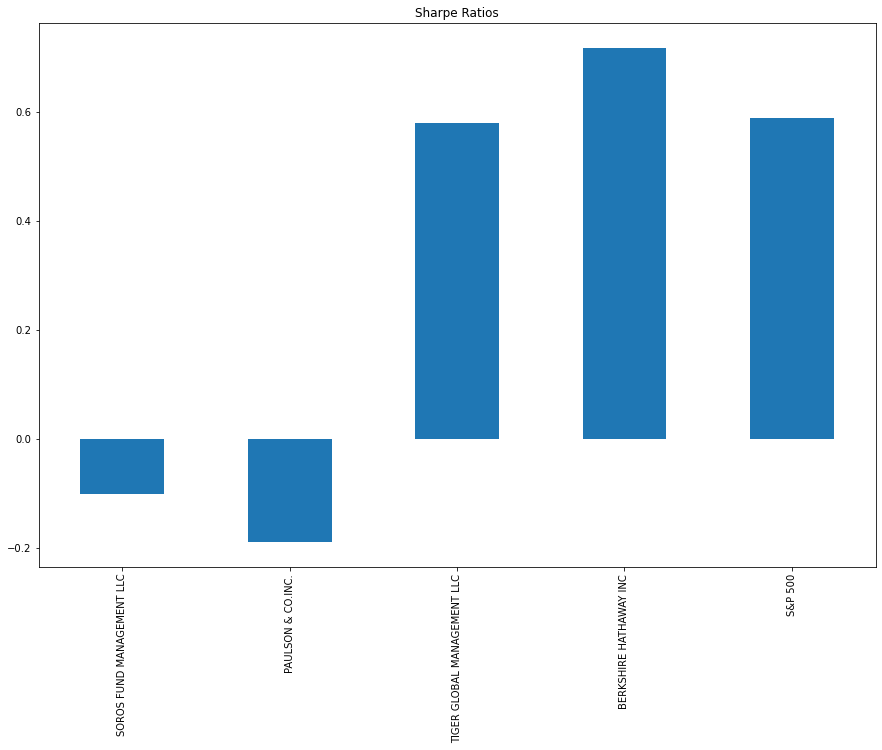

In [30]:
# Visualizes the Sharpe ratios as a bar chart.
all_sharpe_ratio.plot.bar(figsize = (15, 10), title = "Sharpe Ratios")

***Question** Which of the four portfolios offers the best risk-return profile? Which offers the worst?*
    
***Answer** Berkshire offers the best return, though it is the most risky. Tiger offers a very good return, almost equal to the market, with the lowest risk of all of them. Paulson is offering the worst returns with a decent amount of risk, making it the worst according to the current data.*

---

### Diversify the Portfolio

Evaluate how the portfolios react relative to the broader market.

#### Calculate the variance of the S&P 500 by using a 60-day rolling window.

In [31]:
# Calculates the variance of the S&P 500 using a rolling 60-day window.
snp_60_rolling_variance = all_daily_returns["S&P 500"].rolling(window = 60).var()

# Reviews the last 5 rows of the variance data.
snp_60_rolling_variance.tail()

date
2020-09-04    0.000103
2020-09-08    0.000116
2020-09-09    0.000120
2020-09-10    0.000121
2020-09-11    0.000120
Name: S&P 500, dtype: float64

### Review 2 portfolios to choose from based on the previous information.

#### Portfolio 1 - Tiger Global Management LLC

##### Calculate the Covariance of the portfolio.

In [32]:
# Calculates the covariance using a 60-day rolling window.
tgm_60_rolling_covariance = tgm_daily_returns.rolling(window = 60).cov(sp500_daily_returns)

# Reviews the last five rows of the covariance data.
tgm_60_rolling_covariance.tail()

date
2020-09-04    0.000008
2020-09-08    0.000009
2020-09-09    0.000010
2020-09-10    0.000010
2020-09-11    0.000010
dtype: float64

##### Calculate the beta of the portfolio.

In [33]:
# Calculates the beta based on the 60-day rolling covariance compared to the market variance.
tgm_60_rolling_beta = tgm_60_rolling_covariance / snp_60_rolling_variance

# Reviews the last five rows of the beta information.
tgm_60_rolling_beta.tail()

date
2020-09-04    0.081061
2020-09-08    0.076672
2020-09-09    0.079575
2020-09-10    0.080934
2020-09-11    0.081378
dtype: float64

##### Calculate the average value of the 60-day rolling beta of the portfolio.

In [34]:
# Calculates the average of the 60-day rolling beta.
tgm_60_rolling_avb = tgm_60_rolling_beta.mean()
print(f"Tiger Global Management LLC Average Value of the 60-Day Rolling Beta: {tgm_60_rolling_avb: .5f}.")

Tiger Global Management LLC Average Value of the 60-Day Rolling Beta:  0.03093.


##### Plot the 60-day rolling beta.

<AxesSubplot:title={'center':'Tiger Global Management LLC 60-Day Rolling Beta'}, xlabel='date'>

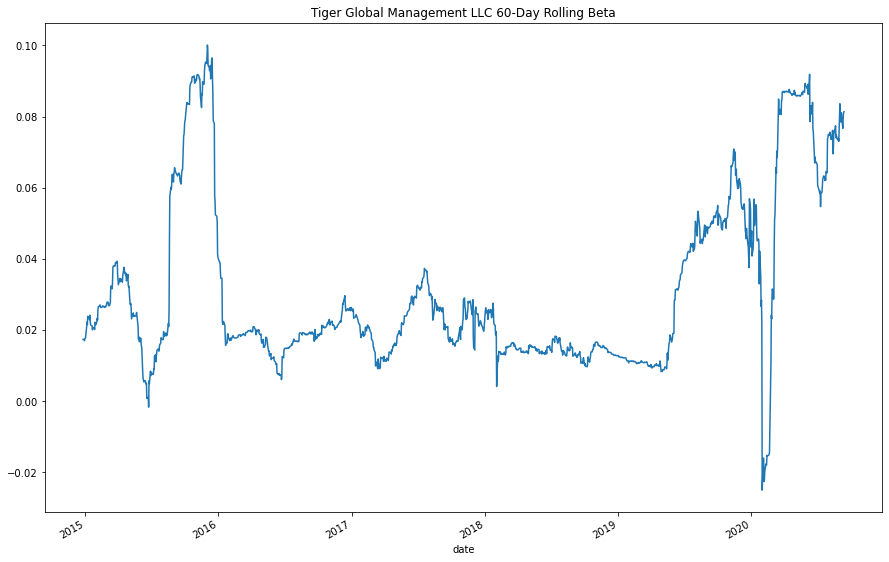

In [35]:
# Plots the rolling beta.
tgm_60_rolling_beta.plot(figsize = (15, 10), title = "Tiger Global Management LLC 60-Day Rolling Beta")

#### Portfolio 2 - Berkshire Hathaway Inc

##### Calculate the Covariance of the portfolio.

In [36]:
# Calculates the covariance using a 60-day rolling window.
bhi_60_rolling_covariance = bhi_daily_returns.rolling(window = 60).cov(sp500_daily_returns)

# Reviews the last five rows of the covariance data.
bhi_60_rolling_covariance.tail()

date
2020-09-04    0.000021
2020-09-08    0.000023
2020-09-09    0.000024
2020-09-10    0.000024
2020-09-11    0.000024
dtype: float64

##### Calculate the beta of the portfolio.

In [37]:
# Calculates the beta based on the 60-day rolling covariance compared to the market variance.
bhi_60_rolling_beta = bhi_60_rolling_covariance / snp_60_rolling_variance

# Reviews the last five rows of the beta information.
bhi_60_rolling_beta.tail()

date
2020-09-04    0.207879
2020-09-08    0.203051
2020-09-09    0.196632
2020-09-10    0.197543
2020-09-11    0.199411
dtype: float64

##### Calculate the average value of the 60-day rolling beta of the portfolio.

In [38]:
# Calculates the average of the 60-day rolling beta.
bhi_60_rolling_avb = bhi_60_rolling_beta.mean()
print(f"Berkshire Hathaway Inc Average Value of the 60-Day Rolling Beta: {bhi_60_rolling_avb: .5f}.")

Berkshire Hathaway Inc Average Value of the 60-Day Rolling Beta:  0.22150.


##### Plot the 60-day rolling beta.

<AxesSubplot:title={'center':'Berkshire Hathaway Inc 60-Day Rolling Beta'}, xlabel='date'>

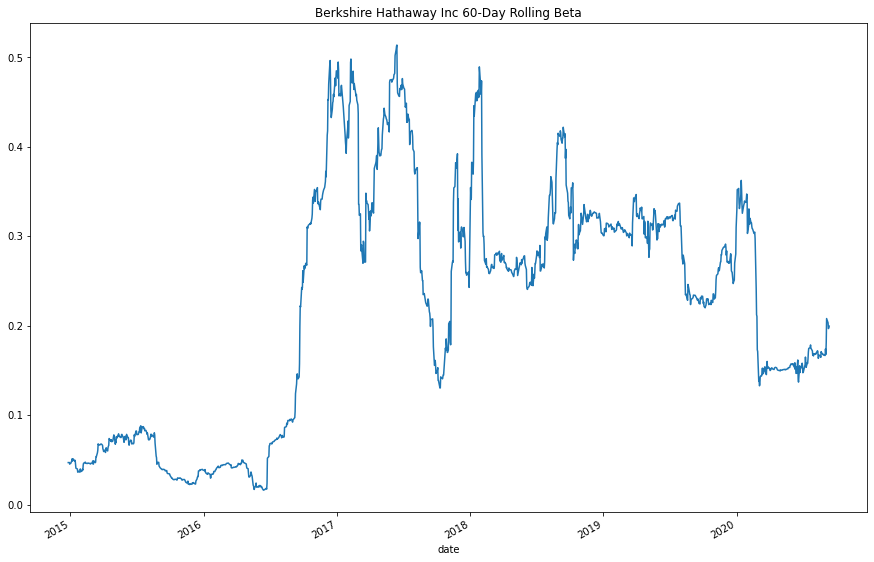

In [39]:
# Plots the rolling beta.
bhi_60_rolling_beta.plot(figsize = (15, 10), title = "Berkshire Hathaway Inc 60-Day Rolling Beta")

***Question 1** Which of the two portfolios seem more sensitive to movements in the S&P 500?*
    
***Answer 1** Portfolio 2 is more sensitive to movements in the market.*


***Question 2** Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?*
    
***Answer 2** This will depend on how risky my company wishes to be, we can grant better returns with Portfolio 2, but we can better protect the current assests with Portfolio 1. As this is for retirement we would want to be less risky with our client's assets and use Portfolio 1 with Tiger Global Management. But I am just giving the recommendation, and in the end it will be up to the people above me to decide if the risk is worth the reward with Berkshire Hathaway Inc.*

---